**HW2 Wenmin Zhang**

**Reference:** 
https://github.com/fangjin/STAT6289/blob/main/Tensor-beginning/cifar10.ipynb
https://github.com/wandb/examples/blob/master/colabs/pytorch/How_does_adding_dropout_affect_model_performance.ipynb

**Begin (a)**

**Load the normalized CIFAR 10**

In [40]:
from google.colab import drive
import sys

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Random seed**

In [41]:
random_seed = 123

import numpy as np 
np.random.seed(random_seed)

import torch
torch.manual_seed(random_seed)

**Load the normalized CIFAR 10**

In [42]:
import torch
import torchvision
import torchvision.transforms as transforms

In [43]:
data_path = '/content/drive/My Drive/Colab Notebooks/DeepLearning/hw2/data/'

In [44]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root=data_path, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=data_path, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


**Define a convolutional Neural Network**

In [45]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


**Define a function to train the model and evaluate train accuracy**

In [46]:
def train_model(model, optimizer, criterion, trainloader, epoch):
    model.train()
    total = 0
    correct = 0
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
        
    accur = 100 * correct // total
    return accur
        

**Define a function to evaluate test accuracy**

In [47]:
def test_accuracy(epoch, model, testloader):
    model.eval()
    correct = 0
    total = 0
    
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accur = 100 * correct // total
    print(f'Accuracy of the network on the 10000 test images in epoch { epoch + 1}: {accur} %')
    return accur
    

**Set the criterion, optimizer and initialize the model CNN**

In [48]:
import torch.optim as optim

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


**Train and test the CNN**

In [49]:
num_epochs = 10

train_accur = []
test_accur = []

for epoch in range(num_epochs):
    accur = train_model(net, optimizer, criterion, trainloader, epoch)
    train_accur.append(accur)
    accur = test_accuracy(epoch, net, testloader)
    test_accur.append(accur)

print('Finished Training')

[1,  2000] loss: 2.189
[1,  4000] loss: 1.867
[1,  6000] loss: 1.669
[1,  8000] loss: 1.557
[1, 10000] loss: 1.485
[1, 12000] loss: 1.437
Accuracy of the network on the 10000 test images in epoch 1: 48 %
[2,  2000] loss: 1.383
[2,  4000] loss: 1.330
[2,  6000] loss: 1.326
[2,  8000] loss: 1.328
[2, 10000] loss: 1.299
[2, 12000] loss: 1.277
Accuracy of the network on the 10000 test images in epoch 2: 53 %
[3,  2000] loss: 1.222
[3,  4000] loss: 1.201
[3,  6000] loss: 1.192
[3,  8000] loss: 1.198
[3, 10000] loss: 1.175
[3, 12000] loss: 1.178
Accuracy of the network on the 10000 test images in epoch 3: 55 %
[4,  2000] loss: 1.102
[4,  4000] loss: 1.102
[4,  6000] loss: 1.091
[4,  8000] loss: 1.087
[4, 10000] loss: 1.107
[4, 12000] loss: 1.097
Accuracy of the network on the 10000 test images in epoch 4: 58 %
[5,  2000] loss: 1.012
[5,  4000] loss: 1.030
[5,  6000] loss: 1.020
[5,  8000] loss: 1.054
[5, 10000] loss: 1.041
[5, 12000] loss: 1.008
Accuracy of the network on the 10000 test imag

**Build a FNN with 0 hidden layer**

In [50]:
class FNN0(nn.Module):
    def __init__(self, p, input_shape):
        super().__init__()
        self.fc1 = nn.Linear(input_shape[0]*input_shape[1]*input_shape[2], 10)
        self.dropout = nn.Dropout(p)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.dropout(x)
        x = self.fc1(x)
        return x


**Set the criterion, optimizer and initialize the model FNN with 0 hidden layer**

In [51]:
dropout_rate = 0.5
input_shape = [3, 32, 32]
fnn0 = FNN0(dropout_rate, input_shape)

criterion_fnn0 = nn.CrossEntropyLoss()
optimizer_fnn0 = optim.SGD(fnn0.parameters(), lr=0.001, momentum=0.9)

**Train and test FNN0**

In [52]:
train_accur_fnn0 = []
test_accur_fnn0 = []

for epoch in range(num_epochs):
    accur = train_model(fnn0, optimizer_fnn0, criterion_fnn0, trainloader, epoch)
    train_accur_fnn0.append(accur)
    accur = test_accuracy(epoch, fnn0, testloader)
    test_accur_fnn0.append(accur)

print('Finished Training')

[1,  2000] loss: 2.438
[1,  4000] loss: 2.729
[1,  6000] loss: 2.778
[1,  8000] loss: 2.881
[1, 10000] loss: 2.924
[1, 12000] loss: 2.930
Accuracy of the network on the 10000 test images in epoch 1: 32 %
[2,  2000] loss: 2.937
[2,  4000] loss: 2.991
[2,  6000] loss: 3.042
[2,  8000] loss: 3.033
[2, 10000] loss: 2.993
[2, 12000] loss: 3.053
Accuracy of the network on the 10000 test images in epoch 2: 31 %
[3,  2000] loss: 3.006
[3,  4000] loss: 3.029
[3,  6000] loss: 3.019
[3,  8000] loss: 3.021
[3, 10000] loss: 3.018
[3, 12000] loss: 3.054
Accuracy of the network on the 10000 test images in epoch 3: 29 %
[4,  2000] loss: 3.005
[4,  4000] loss: 3.017
[4,  6000] loss: 3.080
[4,  8000] loss: 3.036
[4, 10000] loss: 3.037
[4, 12000] loss: 3.028
Accuracy of the network on the 10000 test images in epoch 4: 32 %
[5,  2000] loss: 3.008
[5,  4000] loss: 3.009
[5,  6000] loss: 3.054
[5,  8000] loss: 3.064
[5, 10000] loss: 3.082
[5, 12000] loss: 2.990
Accuracy of the network on the 10000 test imag

**Build a FNN with 1 hidden layer**

In [53]:
class FNN1(nn.Module):
    def __init__(self, p, input_shape):
        super().__init__()
        self.fc1 = nn.Linear(input_shape[0]*input_shape[1]*input_shape[2], 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(p)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

**Set the criterion, optimizer and initialize the model FNN with 1 hidden layer**

In [54]:
dropout_rate = 0.5
input_shape = [3, 32, 32]
fnn1 = FNN1(dropout_rate, input_shape)

criterion_fnn1 = nn.CrossEntropyLoss()
optimizer_fnn1 = optim.SGD(fnn1.parameters(), lr=0.001, momentum=0.9)

**Train and test FNN1**

In [55]:
train_accur_fnn1 = []
test_accur_fnn1 = []

for epoch in range(num_epochs):
    accur = train_model(fnn1, optimizer_fnn1, criterion_fnn1, trainloader, epoch)
    train_accur_fnn1.append(accur)
    accur = test_accuracy(epoch, fnn1, testloader)
    test_accur_fnn1.append(accur)

print('Finished Training')

[1,  2000] loss: 1.980
[1,  4000] loss: 1.959
[1,  6000] loss: 1.942
[1,  8000] loss: 1.993
[1, 10000] loss: 2.000
[1, 12000] loss: 1.993
Accuracy of the network on the 10000 test images in epoch 1: 39 %
[2,  2000] loss: 1.974
[2,  4000] loss: 2.021
[2,  6000] loss: 1.996
[2,  8000] loss: 2.018
[2, 10000] loss: 2.039
[2, 12000] loss: 2.045
Accuracy of the network on the 10000 test images in epoch 2: 39 %
[3,  2000] loss: 2.020
[3,  4000] loss: 2.028
[3,  6000] loss: 2.034
[3,  8000] loss: 2.057
[3, 10000] loss: 2.120
[3, 12000] loss: 2.055
Accuracy of the network on the 10000 test images in epoch 3: 41 %
[4,  2000] loss: 2.033
[4,  4000] loss: 2.057
[4,  6000] loss: 2.058
[4,  8000] loss: 2.095
[4, 10000] loss: 2.081
[4, 12000] loss: 2.096
Accuracy of the network on the 10000 test images in epoch 4: 41 %
[5,  2000] loss: 2.067
[5,  4000] loss: 2.113
[5,  6000] loss: 2.092
[5,  8000] loss: 2.058
[5, 10000] loss: 2.075
[5, 12000] loss: 2.094
Accuracy of the network on the 10000 test imag

**Build a FNN with 2 hidden layers**

In [56]:
class FNN2(nn.Module):
    def __init__(self, p, input_shape):
        super().__init__()
        self.fc1 = nn.Linear(input_shape[0]*input_shape[1]*input_shape[2], 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(p)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

**Set the criterion, optimizer and initialize the model FNN with 2 hidden layers**

In [57]:
dropout_rate = 0.5
input_shape = [3, 32, 32]
fnn2 = FNN2(dropout_rate, input_shape)

criterion_fnn2 = nn.CrossEntropyLoss()
optimizer_fnn2 = optim.SGD(fnn2.parameters(), lr=0.001, momentum=0.9)

**Train and test FNN2**

In [58]:
train_accur_fnn2 = []
test_accur_fnn2 = []

for epoch in range(num_epochs):
    accur = train_model(fnn2, optimizer_fnn2, criterion_fnn2, trainloader, epoch)
    train_accur_fnn2.append(accur)
    accur = test_accuracy(epoch, fnn2, testloader)
    test_accur_fnn2.append(accur)

print('Finished Training')

[1,  2000] loss: 2.030
[1,  4000] loss: 1.873
[1,  6000] loss: 1.827
[1,  8000] loss: 1.833
[1, 10000] loss: 1.791
[1, 12000] loss: 1.766
Accuracy of the network on the 10000 test images in epoch 1: 41 %
[2,  2000] loss: 1.754
[2,  4000] loss: 1.747
[2,  6000] loss: 1.742
[2,  8000] loss: 1.748
[2, 10000] loss: 1.719
[2, 12000] loss: 1.718
Accuracy of the network on the 10000 test images in epoch 2: 44 %
[3,  2000] loss: 1.697
[3,  4000] loss: 1.708
[3,  6000] loss: 1.730
[3,  8000] loss: 1.724
[3, 10000] loss: 1.695
[3, 12000] loss: 1.711
Accuracy of the network on the 10000 test images in epoch 3: 44 %
[4,  2000] loss: 1.700
[4,  4000] loss: 1.686
[4,  6000] loss: 1.695
[4,  8000] loss: 1.676
[4, 10000] loss: 1.705
[4, 12000] loss: 1.708
Accuracy of the network on the 10000 test images in epoch 4: 44 %
[5,  2000] loss: 1.677
[5,  4000] loss: 1.654
[5,  6000] loss: 1.678
[5,  8000] loss: 1.697
[5, 10000] loss: 1.669
[5, 12000] loss: 1.691
Accuracy of the network on the 10000 test imag

**Build a FNN with 3 hidden layers**

In [59]:
class FNN3(nn.Module):
    def __init__(self, p, input_shape):
        super().__init__()
        self.fc1 = nn.Linear(input_shape[0]*input_shape[1]*input_shape[2], 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(p)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

**Set the criterion, optimizer and initialize the model FNN with 3 hidden layers**

In [60]:
dropout_rate = 0.5
input_shape = [3, 32, 32]
fnn3 = FNN3(dropout_rate, input_shape)

criterion_fnn3 = nn.CrossEntropyLoss()
optimizer_fnn3 = optim.SGD(fnn3.parameters(), lr=0.001, momentum=0.9)

**Train and test FNN3**

In [61]:
train_accur_fnn3 = []
test_accur_fnn3 = []

for epoch in range(num_epochs):
    accur = train_model(fnn3, optimizer_fnn3, criterion_fnn3, trainloader, epoch)
    train_accur_fnn3.append(accur)
    accur = test_accuracy(epoch, fnn3, testloader)
    test_accur_fnn3.append(accur)

print('Finished Training')

[1,  2000] loss: 2.124
[1,  4000] loss: 1.944
[1,  6000] loss: 1.901
[1,  8000] loss: 1.848
[1, 10000] loss: 1.805
[1, 12000] loss: 1.845
Accuracy of the network on the 10000 test images in epoch 1: 38 %
[2,  2000] loss: 1.781
[2,  4000] loss: 1.764
[2,  6000] loss: 1.766
[2,  8000] loss: 1.762
[2, 10000] loss: 1.748
[2, 12000] loss: 1.734
Accuracy of the network on the 10000 test images in epoch 2: 43 %
[3,  2000] loss: 1.718
[3,  4000] loss: 1.717
[3,  6000] loss: 1.706
[3,  8000] loss: 1.701
[3, 10000] loss: 1.708
[3, 12000] loss: 1.709
Accuracy of the network on the 10000 test images in epoch 3: 45 %
[4,  2000] loss: 1.675
[4,  4000] loss: 1.676
[4,  6000] loss: 1.688
[4,  8000] loss: 1.681
[4, 10000] loss: 1.693
[4, 12000] loss: 1.665
Accuracy of the network on the 10000 test images in epoch 4: 44 %
[5,  2000] loss: 1.640
[5,  4000] loss: 1.664
[5,  6000] loss: 1.664
[5,  8000] loss: 1.656
[5, 10000] loss: 1.668
[5, 12000] loss: 1.644
Accuracy of the network on the 10000 test imag

**Build a FNN with 4 hidden layers**

In [62]:
class FNN4(nn.Module):
    def __init__(self, p, input_shape):
        super().__init__()
        self.fc1 = nn.Linear(input_shape[0]*input_shape[1]*input_shape[2], 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(p)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)
        return x

**Set the criterion, optimizer and initialize the model FNN with 4 hidden layers**

In [63]:
dropout_rate = 0.5
input_shape = [3, 32, 32]
fnn4 = FNN4(dropout_rate, input_shape)

criterion_fnn4 = nn.CrossEntropyLoss()
optimizer_fnn4 = optim.SGD(fnn4.parameters(), lr=0.001, momentum=0.9)

**Train and test FNN4**

In [64]:
train_accur_fnn4 = []
test_accur_fnn4 = []

for epoch in range(num_epochs):
    accur = train_model(fnn4, optimizer_fnn4, criterion_fnn4, trainloader, epoch)
    train_accur_fnn4.append(accur)
    accur = test_accuracy(epoch, fnn4, testloader)
    test_accur_fnn4.append(accur)

print('Finished Training')

[1,  2000] loss: 2.230
[1,  4000] loss: 2.030
[1,  6000] loss: 1.968
[1,  8000] loss: 1.913
[1, 10000] loss: 1.894
[1, 12000] loss: 1.842
Accuracy of the network on the 10000 test images in epoch 1: 38 %
[2,  2000] loss: 1.806
[2,  4000] loss: 1.829
[2,  6000] loss: 1.806
[2,  8000] loss: 1.779
[2, 10000] loss: 1.777
[2, 12000] loss: 1.774
Accuracy of the network on the 10000 test images in epoch 2: 43 %
[3,  2000] loss: 1.731
[3,  4000] loss: 1.741
[3,  6000] loss: 1.734
[3,  8000] loss: 1.719
[3, 10000] loss: 1.733
[3, 12000] loss: 1.706
Accuracy of the network on the 10000 test images in epoch 3: 43 %
[4,  2000] loss: 1.710
[4,  4000] loss: 1.691
[4,  6000] loss: 1.687
[4,  8000] loss: 1.672
[4, 10000] loss: 1.668
[4, 12000] loss: 1.670
Accuracy of the network on the 10000 test images in epoch 4: 45 %
[5,  2000] loss: 1.645
[5,  4000] loss: 1.687
[5,  6000] loss: 1.657
[5,  8000] loss: 1.674
[5, 10000] loss: 1.657
[5, 12000] loss: 1.644
Accuracy of the network on the 10000 test imag

**Results for (a):**

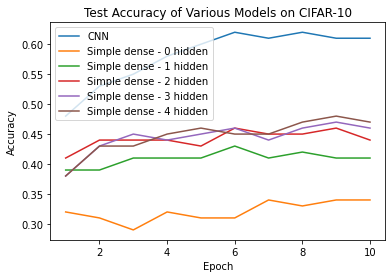

In [74]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs+1), np.array(test_accur)/100)
plt.plot(range(1, num_epochs+1), np.array(test_accur_fnn0)/100)
plt.plot(range(1, num_epochs+1), np.array(test_accur_fnn1)/100)
plt.plot(range(1, num_epochs+1), np.array(test_accur_fnn2)/100)
plt.plot(range(1, num_epochs+1), np.array(test_accur_fnn3)/100)
plt.plot(range(1, num_epochs+1), np.array(test_accur_fnn4)/100)

plt.title('Test Accuracy of Various Models on CIFAR-10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['CNN', 'Simple dense - 0 hidden', 'Simple dense - 1 hidden', 'Simple dense - 2 hidden', 'Simple dense - 3 hidden', 'Simple dense - 4 hidden'], 
           loc='upper left')

plt.show()

In [66]:
import pandas as pd
results_a = pd.DataFrame([test_accur, test_accur_fnn0, test_accur_fnn1, test_accur_fnn2, test_accur_fnn3, test_accur_fnn4])
results_a.to_csv(path_or_buf= data_path + 'results_a.csv', index=False)

The model with 0 hidden layer has the worst performance compared to other models. This model is equivalent to a linear model which is too simple to classify images correctly. Here, the CNN has the best performance among these models. By kernels, CNN can capture the same feature in different places. It also share parameters among nodes, which can reduce the complexity of the model and reduce variance. The simple dense neural networks with layers have many parameters and easy to overfit the data. 

**Begin (b)**

**Build a CNN with sigmoid units** 

In [70]:
import torch.nn as nn
import torch.nn.functional as F

class Net_sigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.sigmoid(self.conv1(x)))
        x = self.pool(torch.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


**Set the criterion, optimizer and initialize the model CNN with sigmoid units**

In [71]:
net_sigmoid = Net_sigmoid()

criterion_s = nn.CrossEntropyLoss()
optimizer_s = optim.SGD(net_sigmoid.parameters(), lr=0.001, momentum=0.9)

**Train and test CNN with sigmoid units**

In [72]:
train_accur_s = []
test_accur_s = []

for epoch in range(num_epochs):
    accur = train_model(net_sigmoid, optimizer_s, criterion_s, trainloader, epoch)
    train_accur_s.append(accur)
    accur = test_accuracy(epoch, net_sigmoid, testloader)
    test_accur_s.append(accur)

print('Finished Training')

[1,  2000] loss: 2.315
[1,  4000] loss: 2.314
[1,  6000] loss: 2.313
[1,  8000] loss: 2.313
[1, 10000] loss: 2.310
[1, 12000] loss: 2.310
Accuracy of the network on the 10000 test images in epoch 1: 10 %
[2,  2000] loss: 2.311
[2,  4000] loss: 2.308
[2,  6000] loss: 2.310
[2,  8000] loss: 2.309
[2, 10000] loss: 2.307
[2, 12000] loss: 2.307
Accuracy of the network on the 10000 test images in epoch 2: 10 %
[3,  2000] loss: 2.307
[3,  4000] loss: 2.306
[3,  6000] loss: 2.305
[3,  8000] loss: 2.306
[3, 10000] loss: 2.306
[3, 12000] loss: 2.305
Accuracy of the network on the 10000 test images in epoch 3: 10 %
[4,  2000] loss: 2.306
[4,  4000] loss: 2.306
[4,  6000] loss: 2.306
[4,  8000] loss: 2.305
[4, 10000] loss: 2.305
[4, 12000] loss: 2.304
Accuracy of the network on the 10000 test images in epoch 4: 10 %
[5,  2000] loss: 2.304
[5,  4000] loss: 2.304
[5,  6000] loss: 2.305
[5,  8000] loss: 2.305
[5, 10000] loss: 2.304
[5, 12000] loss: 2.304
Accuracy of the network on the 10000 test imag

**Results for (b):**

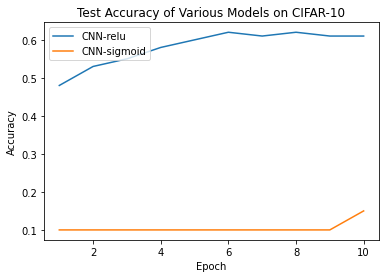

In [75]:
plt.plot(range(1, num_epochs+1), np.array(test_accur)/100)
plt.plot(range(1, num_epochs+1), np.array(test_accur_s)/100)

plt.title('Test Accuracy of Various Models on CIFAR-10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['CNN-relu', 'CNN-sigmoid'], loc='upper left')

plt.show()

In [76]:
import pandas as pd
results_b = pd.DataFrame([test_accur, test_accur_s])
results_b.to_csv(path_or_buf= data_path + 'results_b.csv', index=False)

The convolutional neural network with rectified linear units has better performance than that with sigmoid units. The gradient of the sigmoid function is between 0 and 1. With multilayers, the gradient in each step is very small, which makes the model converge slowly and causes vanishing gradient. That is why the accuracy has an obvious change only after 9 epochs in the model with sigmoid units.


**Begin (c)**

**Build a CNN with dropout**

In [77]:
import torch.nn as nn
import torch.nn.functional as F


class Net_dropout(nn.Module):
    def __init__(self, p):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(p)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

**Set the criterion, optimizer and initialize the model CNN with dropout**

In [83]:
dropout_rate = 0.5

net_drop = Net_dropout(dropout_rate)

criterion_drop = nn.CrossEntropyLoss()
optimizer_drop = optim.SGD(net_drop.parameters(), lr=0.001, momentum=0.9)

**Train and test CNN with dropout**

In [84]:
train_accur_drop = []
test_accur_drop = []
num_epochs = 30

for epoch in range(num_epochs):
    accur = train_model(net_drop, optimizer_drop, criterion_drop, trainloader, epoch)
    train_accur_drop.append(accur)
    accur = test_accuracy(epoch, net_drop, testloader)
    test_accur_drop.append(accur)

print('Finished Training')

[1,  2000] loss: 2.275
[1,  4000] loss: 2.079
[1,  6000] loss: 1.964
[1,  8000] loss: 1.903
[1, 10000] loss: 1.831
[1, 12000] loss: 1.806
Accuracy of the network on the 10000 test images in epoch 1: 39 %
[2,  2000] loss: 1.732
[2,  4000] loss: 1.715
[2,  6000] loss: 1.704
[2,  8000] loss: 1.691
[2, 10000] loss: 1.656
[2, 12000] loss: 1.665
Accuracy of the network on the 10000 test images in epoch 2: 45 %
[3,  2000] loss: 1.629
[3,  4000] loss: 1.635
[3,  6000] loss: 1.631
[3,  8000] loss: 1.626
[3, 10000] loss: 1.597
[3, 12000] loss: 1.620
Accuracy of the network on the 10000 test images in epoch 3: 45 %
[4,  2000] loss: 1.583
[4,  4000] loss: 1.614
[4,  6000] loss: 1.599
[4,  8000] loss: 1.589
[4, 10000] loss: 1.579
[4, 12000] loss: 1.581
Accuracy of the network on the 10000 test images in epoch 4: 49 %
[5,  2000] loss: 1.568
[5,  4000] loss: 1.559
[5,  6000] loss: 1.573
[5,  8000] loss: 1.563
[5, 10000] loss: 1.566
[5, 12000] loss: 1.563
Accuracy of the network on the 10000 test imag

**Set the criterion, optimizer and initialize the model CNN without dropout**

In [85]:

net_nodrop = Net()

criterion_nodrop = nn.CrossEntropyLoss()
optimizer_nodrop = optim.SGD(net_nodrop.parameters(), lr=0.001, momentum=0.9)

**Train and test CNN without dropout**

In [86]:
train_accur_nodrop = []
test_accur_nodrop = []

for epoch in range(num_epochs):
    accur = train_model(net_nodrop, optimizer_nodrop, criterion_nodrop, trainloader, epoch)
    train_accur_nodrop.append(accur)
    accur = test_accuracy(epoch, net_nodrop, testloader)
    test_accur_nodrop.append(accur)

print('Finished Training')

[1,  2000] loss: 2.165
[1,  4000] loss: 1.834
[1,  6000] loss: 1.683
[1,  8000] loss: 1.585
[1, 10000] loss: 1.532
[1, 12000] loss: 1.458
Accuracy of the network on the 10000 test images in epoch 1: 46 %
[2,  2000] loss: 1.384
[2,  4000] loss: 1.363
[2,  6000] loss: 1.330
[2,  8000] loss: 1.321
[2, 10000] loss: 1.320
[2, 12000] loss: 1.284
Accuracy of the network on the 10000 test images in epoch 2: 55 %
[3,  2000] loss: 1.206
[3,  4000] loss: 1.199
[3,  6000] loss: 1.219
[3,  8000] loss: 1.192
[3, 10000] loss: 1.191
[3, 12000] loss: 1.175
Accuracy of the network on the 10000 test images in epoch 3: 57 %
[4,  2000] loss: 1.107
[4,  4000] loss: 1.115
[4,  6000] loss: 1.098
[4,  8000] loss: 1.084
[4, 10000] loss: 1.121
[4, 12000] loss: 1.084
Accuracy of the network on the 10000 test images in epoch 4: 60 %
[5,  2000] loss: 1.027
[5,  4000] loss: 1.033
[5,  6000] loss: 1.033
[5,  8000] loss: 1.052
[5, 10000] loss: 1.031
[5, 12000] loss: 1.035
Accuracy of the network on the 10000 test imag

**With data augmentation**

In [87]:
transform_aug = transforms.Compose(
    [transforms.RandomHorizontalFlip(p=0.5),
     transforms.RandomCrop(size=32, padding=4),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset_aug = torchvision.datasets.CIFAR10(root=data_path, train=True,
                                        download=True, transform=transform_aug)
trainloader_aug = torch.utils.data.DataLoader(trainset_aug, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


Files already downloaded and verified


**Train and test CNN with data augmentation and without dropout**

In [90]:
net_nodrop_aug = Net()

criterion_nodrop_aug = nn.CrossEntropyLoss()
optimizer_nodrop_aug = optim.SGD(net_nodrop_aug.parameters(), lr=0.001, momentum=0.9)

train_accur_nodrop_aug = []
test_accur_nodrop_aug = []

for epoch in range(num_epochs):
    accur = train_model(net_nodrop_aug, optimizer_nodrop_aug, criterion_nodrop_aug, trainloader_aug, epoch)
    train_accur_nodrop_aug.append(accur)
    accur = test_accuracy(epoch, net_nodrop_aug, testloader)
    test_accur_nodrop_aug.append(accur)

print('Finished Training')


[1,  2000] loss: 2.216
[1,  4000] loss: 1.946
[1,  6000] loss: 1.817
[1,  8000] loss: 1.728
[1, 10000] loss: 1.675
[1, 12000] loss: 1.634
Accuracy of the network on the 10000 test images in epoch 1: 46 %
[2,  2000] loss: 1.581
[2,  4000] loss: 1.541
[2,  6000] loss: 1.508
[2,  8000] loss: 1.486
[2, 10000] loss: 1.474
[2, 12000] loss: 1.471
Accuracy of the network on the 10000 test images in epoch 2: 51 %
[3,  2000] loss: 1.418
[3,  4000] loss: 1.400
[3,  6000] loss: 1.394
[3,  8000] loss: 1.402
[3, 10000] loss: 1.368
[3, 12000] loss: 1.356
Accuracy of the network on the 10000 test images in epoch 3: 55 %
[4,  2000] loss: 1.328
[4,  4000] loss: 1.345
[4,  6000] loss: 1.328
[4,  8000] loss: 1.312
[4, 10000] loss: 1.311
[4, 12000] loss: 1.288
Accuracy of the network on the 10000 test images in epoch 4: 58 %
[5,  2000] loss: 1.297
[5,  4000] loss: 1.269
[5,  6000] loss: 1.308
[5,  8000] loss: 1.258
[5, 10000] loss: 1.278
[5, 12000] loss: 1.266
Accuracy of the network on the 10000 test imag

**Train and test CNN with data augmentation and with dropout**

In [91]:
dropout_rate = 0.5

net_drop_aug = Net_dropout(dropout_rate)

criterion_drop_aug = nn.CrossEntropyLoss()
optimizer_drop_aug = optim.SGD(net_drop_aug.parameters(), lr=0.001, momentum=0.9)

train_accur_drop_aug = []
test_accur_drop_aug = []

for epoch in range(num_epochs):
    accur = train_model(net_drop_aug, optimizer_drop_aug, criterion_drop_aug, trainloader_aug, epoch)
    train_accur_drop_aug.append(accur)
    accur = test_accuracy(epoch, net_drop_aug, testloader)
    test_accur_drop_aug.append(accur)

print('Finished Training')

[1,  2000] loss: 2.268
[1,  4000] loss: 2.097
[1,  6000] loss: 2.009
[1,  8000] loss: 1.986
[1, 10000] loss: 1.944
[1, 12000] loss: 1.929
Accuracy of the network on the 10000 test images in epoch 1: 30 %
[2,  2000] loss: 1.896
[2,  4000] loss: 1.882
[2,  6000] loss: 1.864
[2,  8000] loss: 1.837
[2, 10000] loss: 1.812
[2, 12000] loss: 1.799
Accuracy of the network on the 10000 test images in epoch 2: 37 %
[3,  2000] loss: 1.798
[3,  4000] loss: 1.777
[3,  6000] loss: 1.760
[3,  8000] loss: 1.747
[3, 10000] loss: 1.748
[3, 12000] loss: 1.746
Accuracy of the network on the 10000 test images in epoch 3: 42 %
[4,  2000] loss: 1.730
[4,  4000] loss: 1.724
[4,  6000] loss: 1.712
[4,  8000] loss: 1.726
[4, 10000] loss: 1.714
[4, 12000] loss: 1.703
Accuracy of the network on the 10000 test images in epoch 4: 44 %
[5,  2000] loss: 1.668
[5,  4000] loss: 1.709
[5,  6000] loss: 1.693
[5,  8000] loss: 1.712
[5, 10000] loss: 1.676
[5, 12000] loss: 1.672
Accuracy of the network on the 10000 test imag

**Results for (c):**

**Plot for train accuracy**

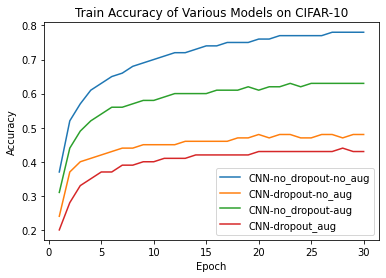

In [92]:
plt.plot(range(1, num_epochs+1), np.array(train_accur_nodrop)/100)
plt.plot(range(1, num_epochs+1), np.array(train_accur_drop)/100)
plt.plot(range(1, num_epochs+1), np.array(train_accur_nodrop_aug)/100)
plt.plot(range(1, num_epochs+1), np.array(train_accur_drop_aug)/100)

plt.title('Train Accuracy of Various Models on CIFAR-10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['CNN-no_dropout-no_aug', 'CNN-dropout-no_aug', 'CNN-no_dropout-aug', 'CNN-dropout_aug'], loc='lower right')

plt.show()

**Plot for test accuracy**

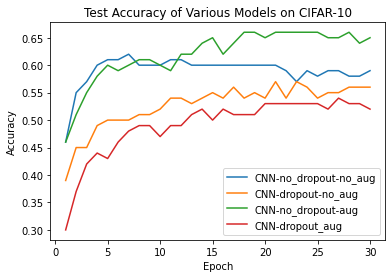

In [94]:
plt.plot(range(1, num_epochs+1), np.array(test_accur_nodrop)/100)
plt.plot(range(1, num_epochs+1), np.array(test_accur_drop)/100)
plt.plot(range(1, num_epochs+1), np.array(test_accur_nodrop_aug)/100)
plt.plot(range(1, num_epochs+1), np.array(test_accur_drop_aug)/100)

plt.title('Test Accuracy of Various Models on CIFAR-10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['CNN-no_dropout-no_aug', 'CNN-dropout-no_aug', 'CNN-no_dropout-aug', 'CNN-dropout_aug'], loc='lower right')


plt.show()

**Save the results in (c)**

In [95]:
import pandas as pd
results_train_c = pd.DataFrame([train_accur_nodrop, train_accur_drop, train_accur_nodrop_aug, train_accur_drop_aug])
results_train_c.to_csv(path_or_buf= data_path + 'results_train_c.csv', index=False)

results_test_c = pd.DataFrame([test_accur_nodrop, test_accur_drop, test_accur_nodrop_aug, test_accur_drop_aug])
results_test_c.to_csv(path_or_buf= data_path + 'results_test_c.csv', index=False)

Models without dropout have better performance than those with dropout. Among them, the convolutional neural network with data augmentation and without dropout has the best performance. The dropout is expected to reduce the train accuracy, which is consistent with the results in the figure. For the test accuarcy, maybe the dropout is beyond a certain threshold and add too many noises for training, and thus affect the fit performance. The augmentation increases the size of training data to help reduce overfitting,  and thus improves the test accuaracy, which is consistent with the results in the figure. 